In [1]:
# some basic imports
import numpy as np
import pandas as pd

In [3]:
# importing file and viewing as dataframe
path = 'Data/IMDB Dataset.csv'
df = pd.read_csv(path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# getting to know shape of data
df.shape

(50000, 2)

In [5]:
# viewing some reviews to know how to clean preprocess
df.iloc[47042,0]

"The first time I saw the poster, I was stunned by its tranquility and beauty. Then the city of Istanbul has been haunting in my mind ever since.<br /><br />Not much dialogue, not much music, the whole film was shot as elaborately and aesthetically like a sculpture. It itself is a landscape.<br /><br />Actually there are a lot of things going on in the film, but the director deliberately omitted most dramatic parts and leave them to our imagination, thus creating a really flat life. **(mild spoiler)One can see Mahmut's ladylove crying in the toilet and then going out without a word but not their fight; one can see Mahmut accompanying his mother in the hospital but not her struggle from illness. The most dramatic scene in the film to me is Yusuf laughing out loud for the toy soldier he bought for his niece,** and that's when it almost broke my heart to see this boring, lonely life bursting out in such a way.<br /><br />With all the trivialities in life weeded, the story presents us with

#### How to clean and preprocess

- Remove HTML tags
- Remove punctuations
- Lowercase
- Stemm/Lemm
- Tokenize

## Cleaning and Preprocessing Text

In [11]:
# cleaning and preprocessing tools
from nlptools import clean, preprocess

In [12]:
# removing html tags
df['processed'] = df['review'].apply(clean.remove_html_tags)

# removing urls
df['processed'] = df['processed'].apply(clean.remove_urls)

# lowercasing
df['processed'] = df['processed'].str.lower()

# removing punctuations
df['processed'] = df['processed'].apply(clean.remove_punctuations)

# removing stop words
df['processed'] = df['processed'].apply(clean.remove_stopwords)

In [13]:
# stemming
df['processed'] = df['processed'].apply(preprocess.stem_text)

# tokenization
df['processed'] = df['processed'].apply(preprocess.tokenize_text)

In [14]:
df.tail(10)

,review,sentiment,processed
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative,"[lame, lame, lame, 90minut, cringefest, that, ..."
49991,"Les Visiteurs, the first movie about the medie...",negative,"[le, visiteur, first, movi, mediev, time, trav..."
49992,John Garfield plays a Marine who is blinded by...,positive,"[john, garfield, play, marin, blind, grenad, f..."
49993,Robert Colomb has two full-time jobs. He's kno...,negative,"[robert, colomb, two, fulltim, job, he, known,..."
49994,This is your typical junk comedy.<br /><br />T...,negative,"[typic, junk, comedyther, almost, laugh, genui..."
49995,I thought this movie did a down right good job...,positive,"[thought, movi, right, good, job, wasnt, creat..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,I am a Catholic taught in parochial elementary...,negative,"[cathol, taught, parochi, elementari, school, ..."
49998,I'm going to have to disagree with the previou...,negative,"[im, go, disagre, previou, comment, side, malt..."
49999,No one expects the Star Trek movies to be high...,negative,"[one, expect, star, trek, movi, high, art, fan..."


## Splitting Train / Test Set

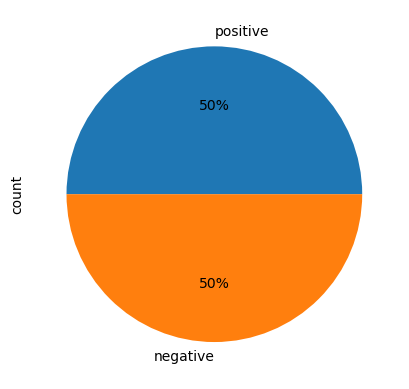

In [17]:
# split of labels
df['sentiment'].value_counts().plot(kind='pie',autopct='%d%%');

In [18]:
# splitting train
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['processed'],df['sentiment'],test_size=0.2)
X_train.shape, y_test.shape

((40000,), (10000,))

## Textual Representation

In [20]:
# encoding output labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [21]:
# function to build pos/neg frequency table for each word
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    yslist = np.squeeze(ys).tolist()

    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
            
    return freqs

In [22]:
freqs = build_freqs(X_train,y_train)